# Exploratory-Data-Analysis-Netflix-data-set

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv('netflix_titles.csv', index_col=0)

In [6]:
df.sample(5)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s3398,Movie,ChuChuTV Surprise Eggs Learning Videos (Hindi),NaN,NaN,NaN,"October 18, 2019",2019,TV-Y,34 min,Children & Family Movies,Magic elephant Mr. Harlo uses playtime to help...
s6013,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,"January 1, 2021",2011,R,83 min,"Action & Adventure, Comedies",Two crooks planning a bank heist wind up abduc...
s906,Movie,Super Me,Zhang Chong,"Darren Wang, Song Jia, Cao Bingkun, Wu Gang, C...",China,"May 8, 2021",2021,TV-14,104 min,"Action & Adventure, Dramas, International Movies",A struggling screenwriter discovers his lucrat...
s6217,TV Show,Badalte Rishton Ki Dastaan,NaN,"Additi Gupta, Sanjeeda Sheikh, Kiran Karmarkar...",India,"April 1, 2017",2013,TV-14,1 Season,"International TV Shows, TV Dramas","When a man is killed, his wife and his lover –..."
s8486,Movie,The Right One,Hadi El Bagoury,"Hani Salama, Basma Ahmad, Rania Yousef, Kinda ...",Egypt,"June 13, 2019",2011,TV-14,93 min,"Dramas, International Movies, Romantic Movies","Under pressure to marry, a rich playboy is con..."


In [8]:
df.shape

(8807, 11)

In [10]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data cleaning

Remove null values from the data for analysis

In [11]:
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [12]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [13]:
df['director'] = df['director'].fillna('UKN')
df['cast'] = df['cast'].fillna('UKN')
df['country'] = df['country'].fillna('USA')
df['date_added'] = df['date_added'].fillna('September 21, 2021')
df['duration'] = df['duration'].fillna('90 min')
df['rating'] = df['rating'].fillna('TV-MA')

In [14]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,UKN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,UKN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",USA,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,UKN,UKN,USA,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,UKN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


Remove dublicated values or check 

In [14]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


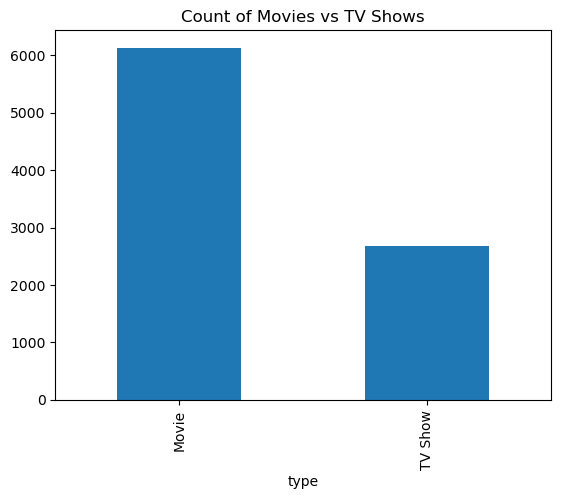

In [18]:
df['type'].value_counts().plot(kind='bar', title='Count of Movies vs TV Shows')
plt.show()

## Observation:

Movies are comparitively more than TV Shows

In [41]:
df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
rating = list(df['rating'].value_counts())
rating = rating.pop(3)
rating_y = list(df['rating'].values)
rating_y.remove('74 min')
rating_y.remove('66 min')
rating_y.remove('84 min')




<BarContainer object of 8804 artists>

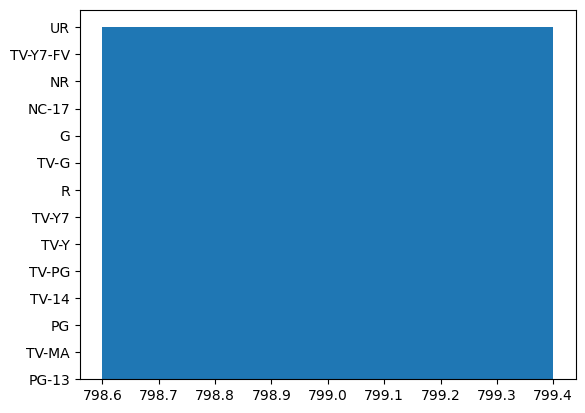

In [45]:
plt.bar(rating,rating_y)

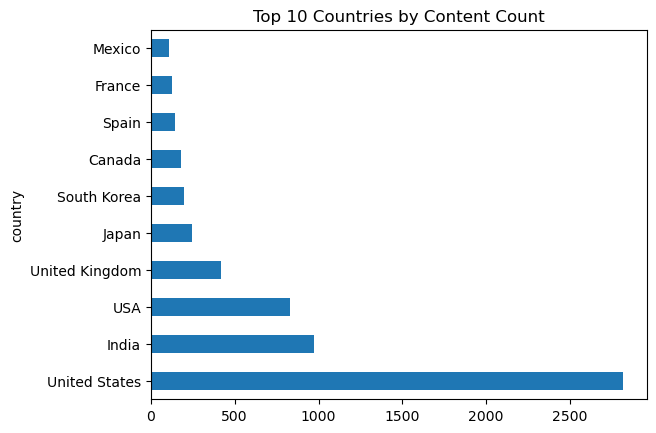

In [20]:
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries by Content Count')
plt.show()

In [24]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')



<Axes: title={'center': 'Top 10 Genres'}>

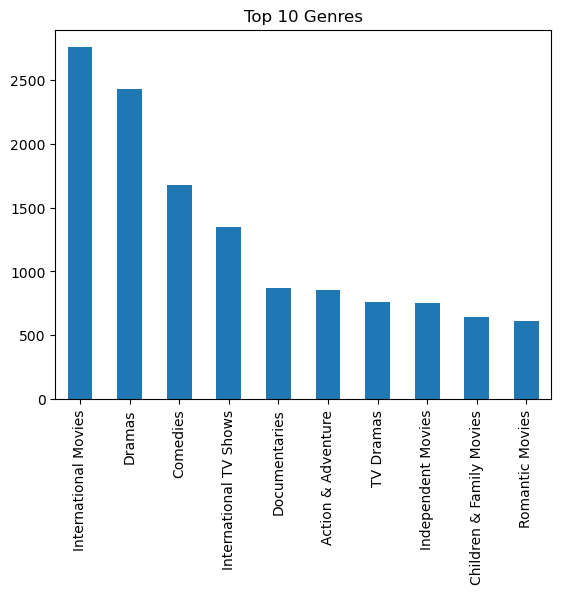

In [25]:
from collections import Counter

genre_counts = Counter()
df['listed_in'].dropna().apply(lambda x: genre_counts.update(x.split(', ')))
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Genres')
